In [811]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

import math

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import plotly.express as px

In [766]:
pd.options.plotting.backend = "plotly"

Метеостанция Санкт-Петербург, Россия, WMO_ID=26063, выборка с 01.02.2005 по 25.01.2023, все дни

Кодировка: UTF-8

Информация предоставлена сайтом ["Расписание Погоды"](http://rp5.ru/)

Обозначения метеопараметров:

обозначение | параметр 
:---:|:---
Дата / Местное время |	Время в данном населённом пункте. Учитывается летнее/зимнее время
T |	Температура воздуха (градусы Цельсия) на высоте 2 метра над поверхностью земли
Po |	Атмосферное давление на уровне станции (миллиметры ртутного столба)
P |	Атмосферное давление, приведенное к среднему уровню моря (миллиметры ртутного столба)
Pa |	Барическая тенденция: изменение атмосферного давления за последние три часа (миллиметры ртутного столба)
U |	Относительная влажность (%) на высоте 2 метра над поверхностью земли
DD |	Направление ветра (румбы) на высоте 10-12 метров над земной поверхностью, осредненное за 10-минутный период, непосредственно предшествовавший сроку наблюдения
Ff |	Cкорость ветра на высоте 10-12 метров над земной поверхностью, осредненная за 10-минутный период, непосредственно предшествовавший сроку наблюдения (метры в секунду)
ff10 |	Максимальное значение порыва ветра на высоте 10-12 метров над земной поверхностью за 10-минутный период, непосредственно предшествующий сроку наблюдения (метры в секунду)
ff3 |	Максимальное значение порыва ветра на высоте 10-12 метров над земной поверхностью за период между сроками (метры в секунду)
N |	Общая облачность
WW |	Текущая погода, сообщаемая с метеорологической станции
W1 |	Прошедшая погода между сроками наблюдения 1
W2 |	Прошедшая погода между сроками наблюдения 2
Tn |	Минимальная температура воздуха (градусы Цельсия) за прошедший период (не более 12 часов)
Tx |	Максимальная температура воздуха (градусы Цельсия) за прошедший период (не более 12 часов)
Cl |	Слоисто-кучевые, слоистые, кучевые и кучево-дождевые облака
Nh |	Количество всех наблюдающихся облаков Cl или, при отсутствии облаков Cl, количество всех наблюдающихся облаков Cm
H |	Высота основания самых низких облаков (м)
Cm |	Высококучевые, высокослоистые и слоисто-дождевые облака
Ch |	Перистые, перисто-кучевые и перисто-слоистые облака
VV |	Горизонтальная дальность видимости (км)
Td |	Температура точки росы на высоте 2 метра над поверхностью земли (градусы Цельсия)
RRR |	Количество выпавших осадков (миллиметры)
tR |	Период времени, за который накоплено указанное количество осадков (часы)
E |	Состояние поверхности почвы без снега или измеримого ледяного покрова
Tg |	Минимальная температура поверхности почвы за ночь. (градусы Цельсия)
E' |	Состояние поверхности почвы со снегом или измеримым ледяным покровом
sss |	Высота снежного покрова (см)

In [786]:
dataset = '26063.01.02.2005.25.01.2023.1.0.0.ru.utf8.00000000.csv'

In [787]:
df = pd.read_csv(dataset, sep=';', comment='#', quotechar='"', 
                 index_col=False, low_memory=False)

In [788]:
df

,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,25.01.2023 15:00,1.6,762.4,762.8,-2.0,89.0,"Ветер, дующий с юго-запада",4.0,NaN,NaN,...,NaN,NaN,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,25.01.2023 12:00,0.8,764.4,764.8,-2.0,88.0,"Ветер, дующий с юго-запада",4.0,NaN,NaN,...,NaN,NaN,10.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,25.01.2023 09:00,0.3,766.4,766.8,-1.7,87.0,"Ветер, дующий с юго-запада",3.0,NaN,NaN,...,NaN,NaN,19.0,-1.7,NaN,NaN,NaN,NaN,NaN,NaN
3,25.01.2023 06:00,0.2,768.1,768.6,-1.8,89.0,"Ветер, дующий с юго-запада",3.0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,4.0,-1.5,0.6,12.0,NaN,NaN,NaN,NaN
4,25.01.2023 03:00,0.3,769.9,770.3,-1.1,92.0,"Ветер, дующий с юго-запада",3.0,NaN,NaN,...,NaN,NaN,4.0,-0.8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52328,01.02.2005 15:00,-7.5,753.5,754.1,NaN,76.0,"Ветер, дующий с юга",3.0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,"Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,-11.0,NaN,NaN,NaN,NaN,NaN,NaN
52329,01.02.2005 12:00,-8.8,752.6,753.2,NaN,76.0,"Ветер, дующий с юго-востока",3.0,NaN,NaN,...,Высокослоистые просвечивающие.,"Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,-12.2,NaN,NaN,NaN,NaN,NaN,NaN
52330,01.02.2005 09:00,-9.4,751.5,752.1,NaN,76.0,"Ветер, дующий с юго-юго-востока",3.0,NaN,NaN,...,Высококучевые башенкообразные или хлопьевидные.,"Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,-12.9,3.0,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,19.0
52331,01.02.2005 06:00,-9.6,750.4,751.0,NaN,75.0,"Ветер, дующий с юга",3.0,NaN,NaN,...,Высококучевые башенкообразные или хлопьевидные.,"Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,-13.2,NaN,NaN,NaN,NaN,NaN,NaN


Преобразование местного времени в datetime и использование его в качестве индекса

In [789]:
df['datetime'] = pd.to_datetime(df['Местное время в Санкт-Петербурге'], 
                                format='%d.%m.%Y %H:%M')

In [790]:
df['year'] = df.datetime.dt.year
df['hour'] = df.datetime.dt.hour
df['dayofyear'] = df.datetime.dt.dayofyear
df.drop(['Местное время в Санкт-Петербурге'], inplace=True, axis=1)
df = df.set_index("datetime").sort_index()

Изучаем уникальные значения в столбцах N и Nh

In [791]:
print(df['N'].unique())
print(df['Nh'].unique())

['100%.' 'Облаков нет.' '20–30%.' '60%.' '70 – 80%.' '50%.'
 '90  или более, но не 100%'
 'Небо не видно из-за тумана и/или других метеорологических явлений.'
 '10%  или менее, но не 0' '40%.' nan]
['100%.' '70 – 80%.' '20–30%.' '60%.' nan '50%.' '40%.'
 '10%  или менее, но не 0' 'Облаков нет.' '90  или более, но не 100%'
 'Небо не видно из-за тумана и/или других метеорологических явлений.']


Заменяем категориальных данных для облачности (N и Nh) на числовые. Для варианта "Небо не видно" выбираем 1.1

In [792]:
N_cat = ['Облаков нет.', '10%  или менее, но не 0', '20–30%.', '40%.',
         '50%.', '60%.', '70 – 80%.', '90  или более, но не 100%', '100%.',
         'Небо не видно из-за тумана и/или других метеорологических явлений.']
N_num = [0.0, 0.1, 0.25, 0.4, 0.5, 0.6, 0.75, 0.9, 1.0, 1.1]
df['N'].replace(N_cat, N_num, inplace=True)
df['Nh'].replace(N_cat, N_num, inplace=True)

Изучаем уникальные значения в столбце H 

In [793]:
print(df['H'].unique())

['200-300' '300-600' '600-1000' nan '2500 или более, или облаков нет.'
 '100-200' '1000-1500' '1500-2000' 'Менее 50' '50-100' '2000-2500']


Заменяем категориальные данные для высоты облаков H на числовые. 
Используем средние значения указанного диапазона или границу для крайних.

In [794]:
H_cat = ['Менее 50', '50-100', '100-200', '200-300', '300-600', '600-1000',
    '1000-1500', '1500-2000', '2000-2500', '2500 или более, или облаков нет.']
H_num = [50, 75, 150, 250, 450, 800, 1250, 1750, 2250, 2500]
df['H'].replace(H_cat, H_num, inplace=True)

Изучаем данные в столбцах VV и RRR

In [795]:
print(df['VV'].unique())
print(df['RRR'].unique())

['4.0' '10.0' '2.0' '0.5' '1.0' nan '0.05' '0.2' '1.6' '2.2' '20.0' '17.0'
 '3.7' '0.7' '19.0' '50.0' 'менее 0.1' '0.4' '29.0' '0.1' '27.0' '6.0'
 '0.3' '45.0' '4.7' '1.5' '18.0' '13.0' '12.0' '11.0' '15.0' '14.0' '16.0'
 '2.7' '3.1' '8.0' '3.0']
[nan '3.0' '0.3' '0.5' 'Следы осадков' '0.8' '0.6' '0.7' '0.2' '2.0' '0.4'
 '4.0' '1.0' '5.0' '7.0' '6.0' '11.0' '9.0' '8.0' '19.0' '12.0' '0.1'
 '38.0' '14.0' '0.9' '16.0' '10.0' '17.0' 'Осадков нет' '23.0' '30.0'
 '21.0' '13.0' '15.0' '18.0' '22.0' '26.0' '24.0' '28.0' '27.0' '20.0'
 '25.0' '35.0' '48.0' '31.0' '29.0']


В столбце "Горизонтальная дальность видимости" почти все значения числовые, но встречается значение "Менее 0.1" - заменяем его на 0.5

In [796]:
df['VV'].replace('менее 0.1', 0.05, inplace=True)

В столбце "Количество выпавших осадков" заменяем "следы осадков" на 0.05 (так как минимальное чиловое значение в этом столбце = 0.1).
Значение "осадков нет" меняем на 0.

In [797]:
RRR_cat = ['Следы осадков', 'Осадков нет']
RRR_num = [0.05, 0]
df['RRR'].replace(RRR_cat, RRR_num, inplace=True)

Разбираемся с ветром, изучаем значения в столбце DD, и преобразуем столбцы DD и Ff в векторное представление ветра. Направление определяем по столбцу DD, а длина вектора будет равна силе ветра из столбца Ff.
Результирующие столбцы - Wind_W (вектор, направленный с запада вдоль оси X) и Wind_S (вектор, направленный с запада вдоль оси X)(вектор, направленный с юга вдоль оси Y) 


In [798]:
df['DD'].unique()

array(['Ветер, дующий с юго-востока', 'Ветер, дующий с юга',
       'Ветер, дующий с юго-юго-востока',
       'Ветер, дующий с юго-юго-запада',
       'Ветер, дующий с востоко-юго-востока',
       'Ветер, дующий с юго-запада', 'Ветер, дующий с западо-юго-запада',
       'Ветер, дующий с запада', 'Ветер, дующий с западо-северо-запада',
       'Штиль, безветрие', 'Ветер, дующий с востока',
       'Ветер, дующий с востоко-северо-востока',
       'Ветер, дующий с северо-востока',
       'Ветер, дующий с северо-северо-запада',
       'Ветер, дующий с северо-северо-востока', 'Ветер, дующий с севера',
       'Ветер, дующий с северо-запада', nan], dtype=object)

In [799]:
# Wind categories
DD_cat = ['Штиль, безветрие', 
          'Ветер, дующий с востоко-северо-востока',
          'Ветер, дующий с северо-востока',
          'Ветер, дующий с северо-северо-востока',
          'Ветер, дующий с севера',
          'Ветер, дующий с северо-северо-запада',
          'Ветер, дующий с северо-запада',
          'Ветер, дующий с западо-северо-запада',
          'Ветер, дующий с запада', 
          'Ветер, дующий с западо-юго-запада',
          'Ветер, дующий с юго-запада',
          'Ветер, дующий с юго-юго-запада',
          'Ветер, дующий с юга',
          'Ветер, дующий с юго-юго-востока',
          'Ветер, дующий с юго-востока',
          'Ветер, дующий с востоко-юго-востока',
          'Ветер, дующий с востока',
         ]
# Arrays with cos and sin of corresponding angles
DD_cos = [math.cos(x*math.pi/8) for x in range(-7, 9)]
DD_sin = [math.sin(x*math.pi/8) for x in range(-7, 9)]
# First element is 'No wind, zero vector'
DD_cos.insert(0, 0)
DD_sin.insert(0, 0)

In [800]:
df['Wind_W'] = df['DD'].replace(DD_cat, DD_cos) * df['Ff']
df['Wind_S'] = df['DD'].replace(DD_cat, DD_sin) * df['Ff']
df.drop(['DD','Ff'], inplace=True, axis=1)

In [801]:
cols = ['T', 'P', 'U', 'Wind_W', 'Wind_S', 'N', 'VV', 'Td', 'hour', 'dayofyear']
wdf = df[cols].dropna()

In [802]:
wdf.describe()

,T,P,U,Wind_W,Wind_S,N,Td,hour,dayofyear
count,51947.000000,51947.000000,51947.000000,51947.000000,5.194700e+04,51947.000000,51947.000000,51947.000000,51947.000000
mean,6.828770,760.079025,75.936089,0.562946,3.705002e-01,0.709027,2.370335,10.517874,183.280651
std,9.816983,8.520133,16.476034,1.619396,1.534918e+00,0.367906,8.638054,6.871096,105.383461
min,-27.700000,720.000000,14.000000,-6.467157,-8.000000e+00,0.000000,-34.800000,0.000000,1.000000
25%,0.300000,754.800000,67.000000,-0.707107,-3.826834e-01,0.400000,-3.100000,6.000000,92.000000
50%,6.300000,760.200000,81.000000,0.382683,1.224647e-16,0.900000,2.100000,12.000000,183.000000
75%,14.600000,765.400000,89.000000,1.847759,1.414214e+00,1.000000,9.400000,18.000000,275.000000
max,36.700000,793.900000,100.000000,8.000000,8.314916e+00,1.100000,23.800000,21.000000,366.000000


График температуры в 12 часов дня за 2022 год - отображение с помощью plotly

In [804]:
wdf.loc[wdf.index.hour == 12].loc['2022-01-01':'2022-12-31',['T']].plot()

In [805]:
# add column for temperature at next time for using as prefiction target

wdf['Y'] = wdf['T'].shift(-1)

In [806]:
wdf

,T,P,U,Wind_W,Wind_S,N,VV,Td,hour,dayofyear,Y
datetime,,,,,,,,,,,
2005-02-01 03:00:00,-8.8,750.0,83.0,-2.828427e+00,2.828427,1.0,4.0,-11.2,3,32,-9.6
2005-02-01 06:00:00,-9.6,751.0,75.0,1.836970e-16,3.000000,1.0,10.0,-13.2,6,32,-9.4
2005-02-01 09:00:00,-9.4,752.1,76.0,-1.148050e+00,2.771639,1.0,10.0,-12.9,9,32,-8.8
2005-02-01 12:00:00,-8.8,753.2,76.0,-2.121320e+00,2.121320,1.0,10.0,-12.2,12,32,-7.5
2005-02-01 15:00:00,-7.5,754.1,76.0,1.836970e-16,3.000000,1.0,10.0,-11.0,15,32,-7.3
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-25 00:00:00,0.3,771.4,94.0,2.121320e+00,2.121320,1.0,4.0,-0.6,0,25,0.3
2023-01-25 03:00:00,0.3,770.3,92.0,2.121320e+00,2.121320,1.0,4.0,-0.8,3,25,0.2
2023-01-25 06:00:00,0.2,768.6,89.0,2.121320e+00,2.121320,1.0,4.0,-1.5,6,25,0.8


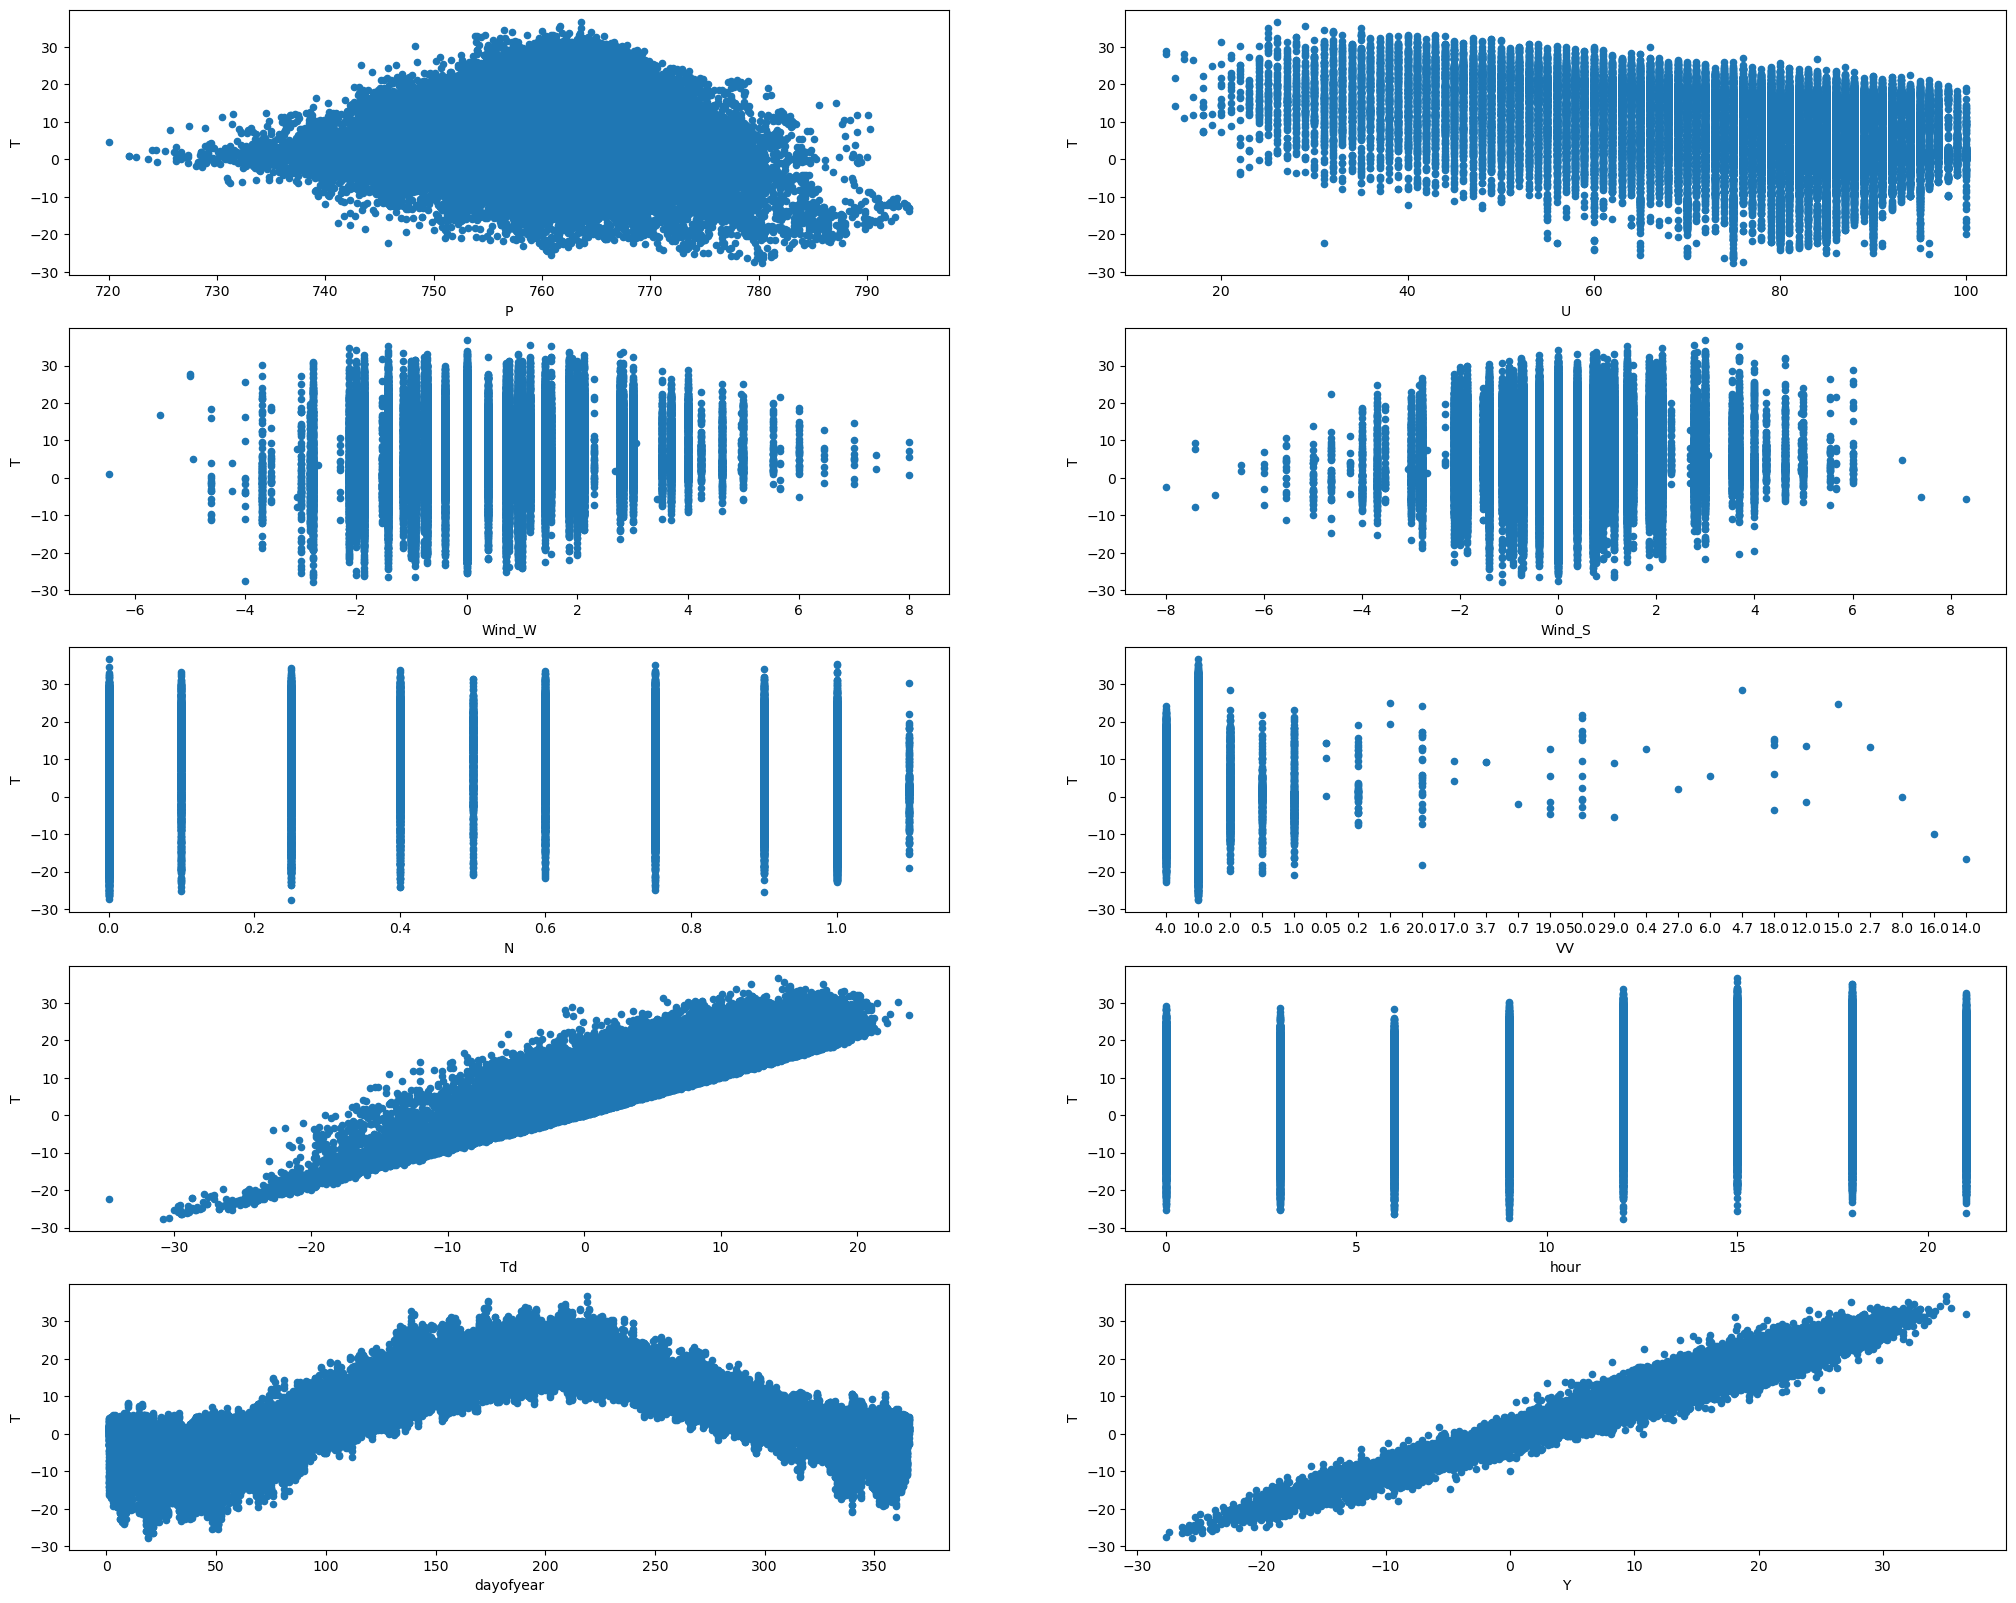

In [813]:
target = "T"
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(25, 20))
delta = 0
for idx, feature in enumerate(wdf.columns):
    if feature == target:
        delta = 1
        continue
    idxd = idx - delta
    wdf.plot(feature, target, subplots=True, kind="scatter", 
             ax=axes[idxd // 2, idxd % 2], backend='matplotlib')

Коррелляция между параметрами - plotly heatmap

In [809]:
fig = px.imshow(wdf.corr(numeric_only=True), color_continuous_scale='RdYlBu')
fig.show()

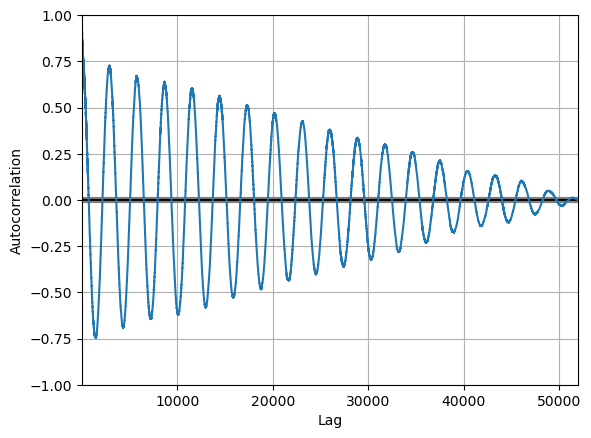

In [822]:
plt.figure();
autocorrelation_plot(wdf[['T']]);

In [835]:
wdf = wdf.dropna()
# split dataset into data and target
X = wdf[cols]
y = wdf['Y']

# split dataset into training and test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34)

# apply standard scaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [836]:
# train and test base linear model and check MSE and R2 score

linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


2.852462169155037
0.9700088794538789


In [837]:
linreg.coef_

array([ 9.02041622e-01,  1.53930333e-02,  1.50243323e-03, -3.63512395e-02,
        8.29479127e-02, -3.50243170e-01, -2.46229310e-03,  1.07088349e-01,
       -3.58465064e-02, -6.88431669e-04])

In [838]:
result = X_test.copy()
result['Y'] = y_test
result['prediction'] = y_pred

<AxesSubplot:xlabel='datetime'>

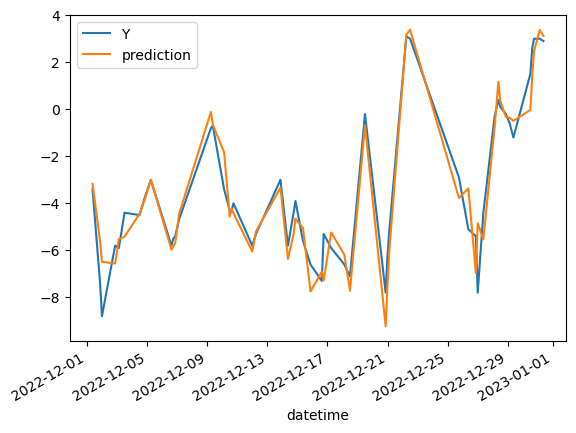

In [839]:
result.loc["2022-12"][['Y','prediction']].plot(backend='matplotlib')